In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.xlsx to heart_disease (13).xlsx


### **Loading The Data set**

In [3]:
df = pd.read_excel("heart_disease.xlsx",sheet_name='Heart_disease')

In [4]:
#Overview of the data set
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
#General Info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


### **General Observations**

**<u>Dataset Overview</u>**

 > There are 908 entries in the data set meaning there are 908 patients readings classified in 13 columns.

<u>Columns and Their data types</u>

Data Types:

 - Integer (int64) - 5 columns
 - Float (float64) - 1 column
 - Boolean (bool) - 1 column
 - Categorical (object) - 6 columns

Columns Description:
- 	age	- Age of the patient (Integer)
- 	sex	- Gender of the patient (Categorical: "Male"/"Female" or encoded as 0/1)
- 	cp - Chest pain type (Categorical: different pain categories)
- 	trestbps - Resting blood pressure (Integer, mm Hg)
- 	chol - Serum cholesterol level (Integer, mg/dL)
- 	fbs	- Fasting blood sugar > 120 mg/dL (Boolean: True/False)
- 	restecg -	Resting ECG results (Categorical: normal, ST-T abnormality, etc.)
- 	thalch - Maximum heart rate achieved (Integer)
- 	exang	- Exercise-induced angina (Categorical: True/False)
- 	oldpeak -	ST depression induced by exercise (Float, may indicate heart issues)
-  slope -	Slope of peak exercise ST segment (Categorical: up, flat, down)
-  thal - Thalassemia (Categorical: normal, fixed defect, reversible defect)
-  num - Target variable (Integer, indicating presence/absence of heart disease)

### **Exploration Data Analysis**

#### **Descriptive Statistics**

In [6]:
#Statistical summary
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
Skewness = df.skew(numeric_only=True)
Kurtosis = df.kurtosis(numeric_only=True) #Skewness and Kurtosis of numerical columns
Missing_values = df.isnull().sum()
Unique_values= df.nunique() #Missing and unique values of the data set

Stats_table = pd.DataFrame({'Skewness':Skewness,
                            'Kurtosis':Kurtosis,
                            'Missing_values':Missing_values,
                            'Unique_values':Unique_values})

Stats_table


,Skewness,Kurtosis,Missing_values,Unique_values
age,-0.136797,-0.428715,0,49
chol,-0.564766,0.074852,0,228
cp,NaN,NaN,0,4
exang,NaN,NaN,0,4
fbs,1.473485,0.171530,0,2
num,0.951409,-0.136034,0,5
oldpeak,1.021709,1.092060,62,53
restecg,NaN,NaN,0,3
sex,NaN,NaN,0,2
slope,NaN,NaN,0,3


In [8]:
df.describe(include=['object','bool']) #Summary of object and boolean type columns

,sex,cp,fbs,restecg,exang,slope,thal
count,908,908,908,908,908,908,908
unique,2,4,2,3,4,3,3
top,Male,asymptomatic,False,normal,False,flat,normal
freq,718,495,723,542,516,453,386


#### **Interpretation Of Descriptive Analysis**

=> Age -Symmetric and slightly flat distribution
 > Mean and median of the age column is ~54 years suggest balanced distribution.Ranging from 29-80 years of the patients means most patients are middle-aged or older, with few young patients.

=> Resting Blood Pressure (trestbps) -  Slightly right skewed, moderate kurtosis with some possible extreme values
 > Min is 0 mmhg which definitely a data entry error with moderate mean and std interquartile range is 120-140 which is normal blood pressure and a special hypertension case with maximum 200 mmhg,presence of few possible errors.

=> Cholesterol (chol) - Slightly left skewed with near normal tails
 > Interquartile range is very high than avg human reading with high mean and std in the distribution ,possible errors in entri stage of readings with some being 0.

=> Maximum Heart Rate (thalch) - Almost symmetric, flat distribution
 > Most of the patients have normal or high heart rate only a few low readings according to mean 135.9 bpm with moderate variation(std :26.8) in the diatribution.

=> ST Depression (oldpeak) - Right skewed, some outliers in ST depression values
 > There are some negetive values that influence the distribution which might possible data error .variance is high (std:1.1) with min in negatives whare as max is in abnormal rate.

=> num(target variable ) - Right skewed, indicating class imbalance
 > After observing the mean(1) there is a balance in heart disease cases in the distribution 0 being no heart disease at all while the number increasing suggest the severity of patients conditions.


#### **Data Visualization Analysis**

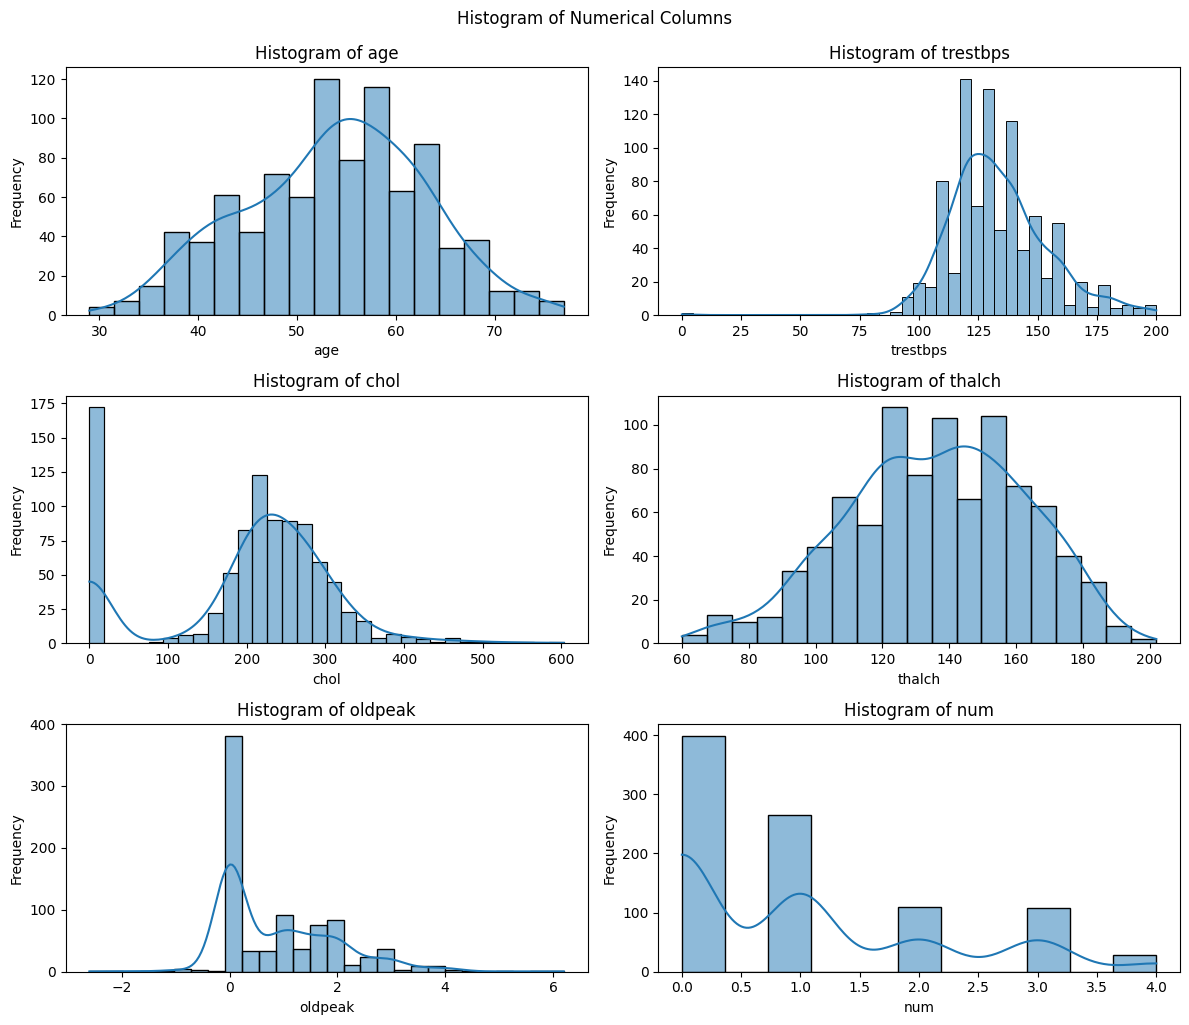

In [9]:
#Histogram of numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

fig,axes = plt.subplots(3,2,figsize=(12,10))
axes = axes.flatten()

for i , col in enumerate(numerical_cols):
  sns.histplot(data=df,x=col,ax=axes[i],kde=True)
  axes[i].set_title(f'Histogram of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histogram of Numerical Columns',y=1.02)
plt.show()

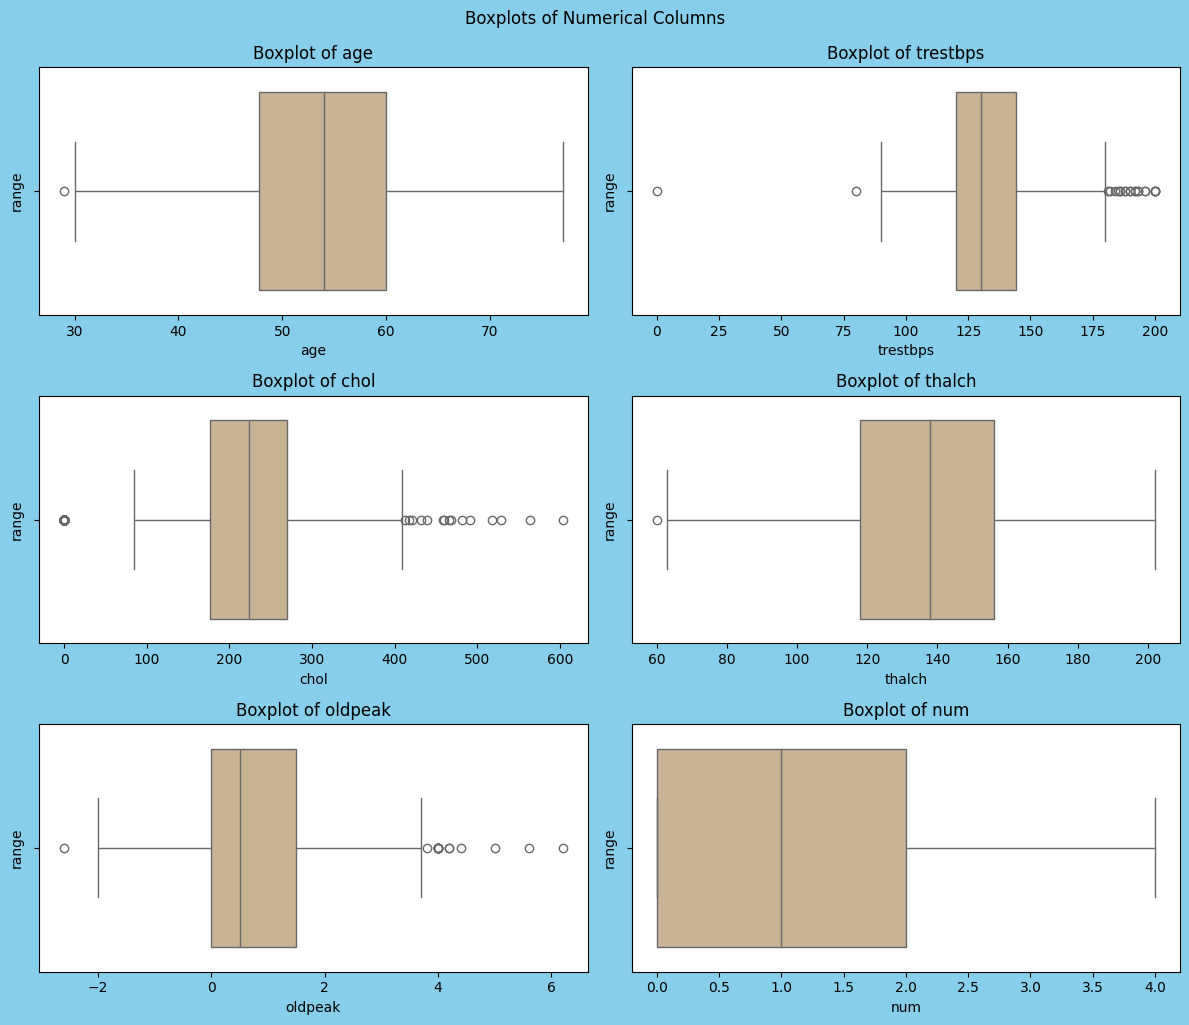

In [10]:
#Boxploting numerical columns to analyze the data set's outliers and interqurtile range
fig, axes = plt.subplots(3,2, figsize=(12,10),facecolor='skyblue')
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i] ,color='tan')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('range')
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns', y=1.02)
plt.show()

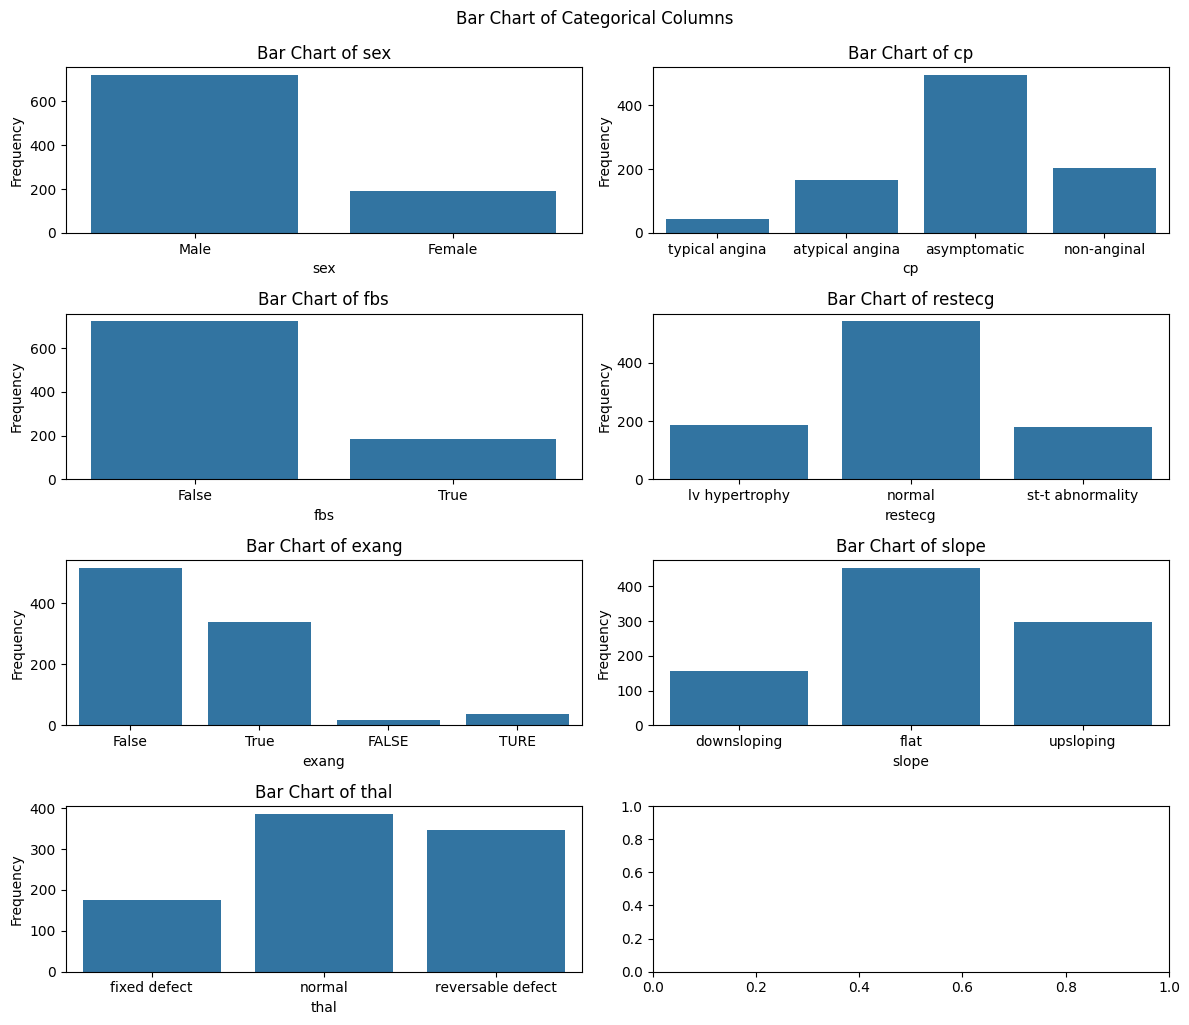

In [11]:
#Bar chart of categorical columns
categorical_cols = df.select_dtypes(include=['object','bool']).columns

fig, axes = plt.subplots(4,2,figsize=(12,10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  sns.countplot(data=df,x=col,ax=axes[i])
  axes[i].set_xlabel
  axes[i].set_ylabel('Frequency')
  axes[i].set_title(f'Bar Chart of {col}')

plt.tight_layout()
plt.suptitle('Bar Chart of Categorical Columns',y=1.02)
plt.show()

<Figure size 1000x800 with 0 Axes>

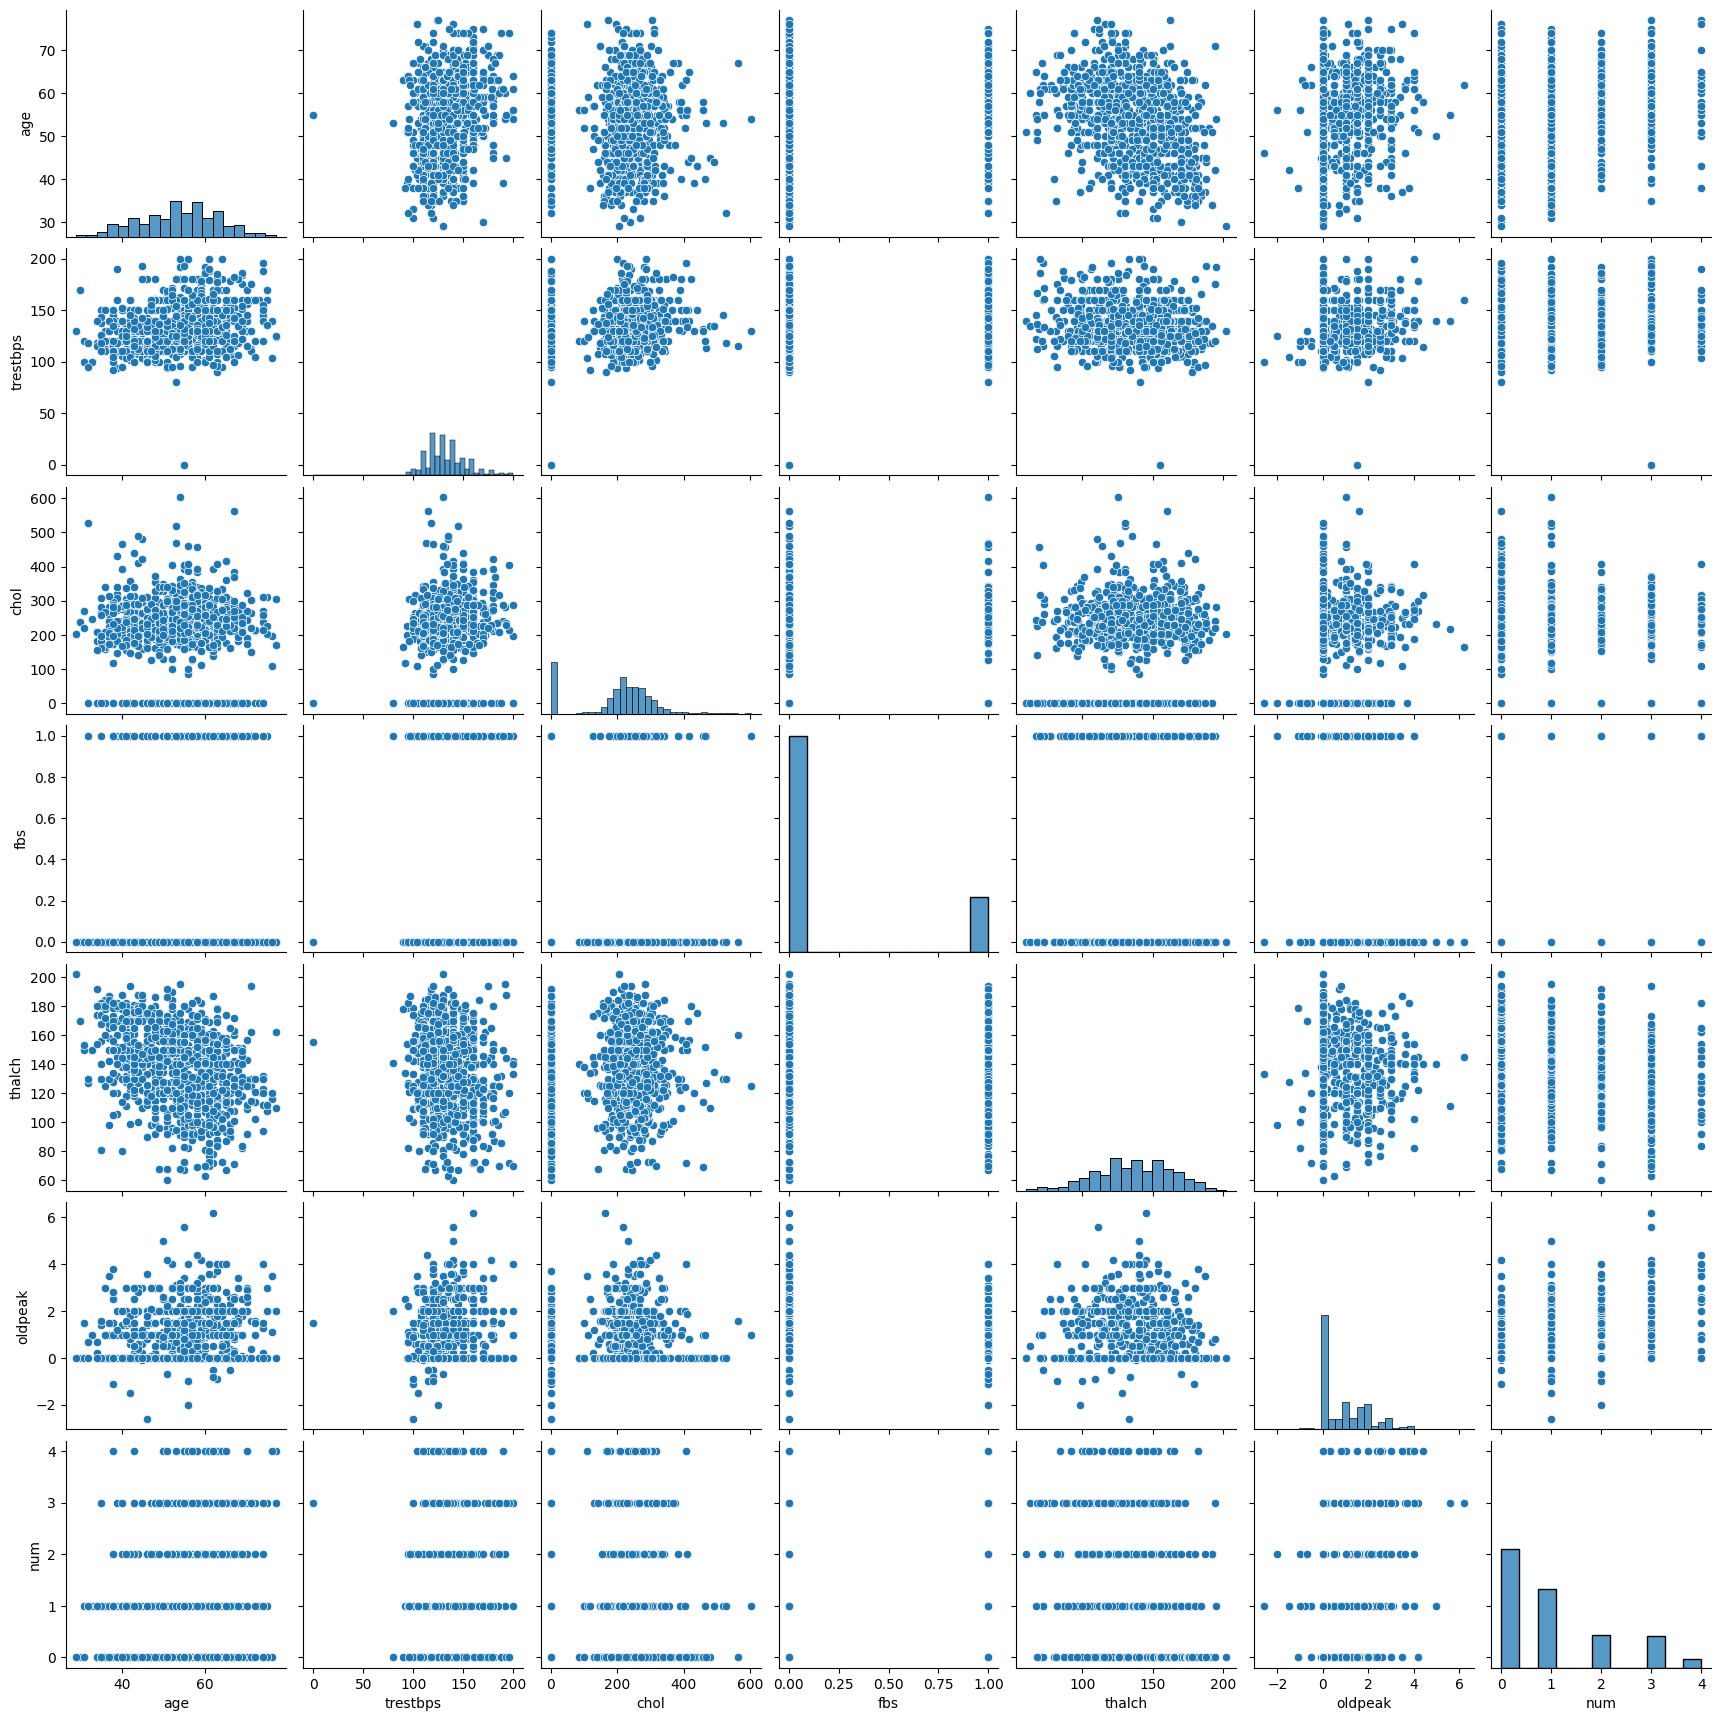

In [12]:
#Scatterploting all numerical columns
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

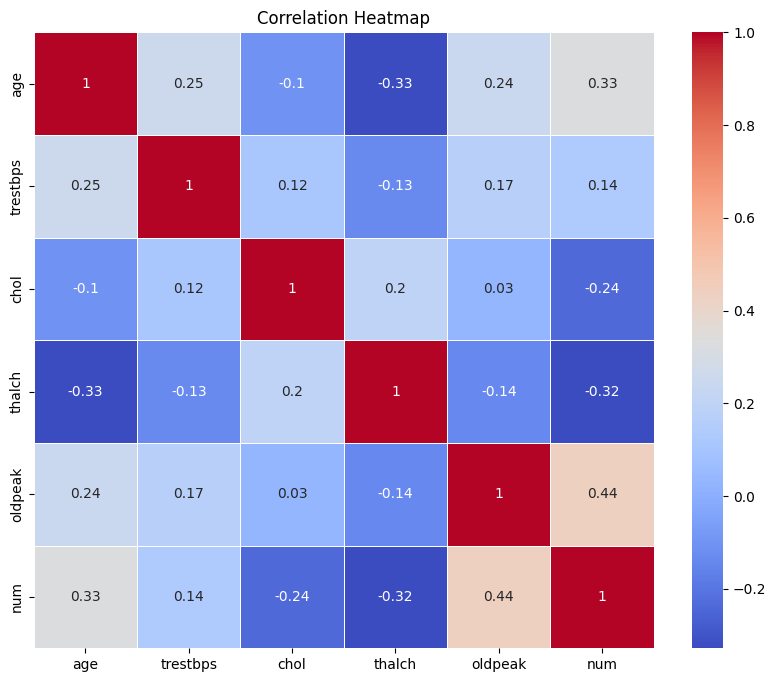

In [13]:
#Correlation heatmap of numerical columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### **Insights and Patterns**

**<u>From Histograms & Boxplots</u>**

- age:- age of the patients is normally distributed, peaking around 50-60 years.
- trestbps (Resting Blood Pressure): Most patients normal - high blood preassure and the distribution is right-skewed, with most values between 120-140 mmHg.
- Chol (Cholesterol):- The distribution is positively skewed with some extreme outliers above 400 mg/dL even 600 mg/dL suggesting in there is a significant increase in cholesterol levels
- Thalach (Maximum Heart Rate Achieved):- Roughly normal distribution, peaking around 140–160 bpm indicating patients have high heart rates than avg humans.
- Oldpeak (ST Depression Induced by Exercise):- Right-skewed distribution with some extreme values.
- Num (Heart Disease Indicator):- Discrete values, indicating different severity levels.(from 0(no disease) to 4 last stages of heart disease)

<u>From Boxplots</u>
 - Outliers are present in trestbps, chol, and oldpeak, suggesting possible extreme cases and data entry errors
 - age and thalach have a more symmetric distribution.

**<u>Categorical Variable Distribution (From Bar Charts)</u>**

- Sex:- There are more males than females in the dataset.
- Chest Pain Type (cp):- Majority of patients have asymptomatic chest pain.
- Fasting Blood Sugar (fbs):- Most patients have fasting blood sugar <120 mg/dL.
- Resting ECG (restecg):- Majority have normal ECG.
- Exercise Induced Angina (exang):- More patients do not experience angina.
- Slope of ST Segment:- Most have a flat ST segment.
- Thalassemia (thal):- Normal and Reversible Defect cases are common.

**<u>Pairplot (Scatter Matrix)</u>**

- Weak correlations between numerical variables suggest no strong linear relationship.
- A some correlation between num &age,old peak

**<u>From Correlation Heatmap</u>**
- Oldpeak vs. Num: Highest correlation (0.44), indicating ST depression is a key factor.
- Thalach vs. Num: Negative correlation (-0.32), suggesting lower max heart rate may indicate heart disease.
- Age vs. Num: Moderate correlation (0.33), showing an increase in age is associated with heart disease.

### **Feature Engineering**

#### **Handling Missing Values**

In [14]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [15]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [16]:
pd.set_option('future.no_silent_downcasting', True)

#### **Encoding Categorical Variables**

In [17]:
from sklearn.preprocessing import LabelEncoder
selected_columns = ['cp','restecg','slope','thal']

le = LabelEncoder()

for col in selected_columns:
  df[col] = le.fit_transform(df[col])

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,0,150,False,2.3,0,0,0
1,41,Male,1,135,203,False,1,132,False,0.0,1,0,0
2,57,Male,0,140,192,False,1,148,False,0.4,1,0,0
3,52,Male,3,118,186,False,0,190,False,0.0,1,0,0
4,57,Male,0,110,201,False,1,126,True,1.5,1,0,0


In [19]:
#Mapping gender of the patients as male:1,female = 0
gender_mapping = {'Male':1,'Female':0}
df['sex'] = df['sex'].map(gender_mapping)

In [20]:
df['sex'] = df['sex'].fillna(df['sex'].mode()).astype(int)

In [21]:
df[['fbs','exang']] = df[['fbs','exang']].replace({'TRUE': 1, 'FALSE': 0, 'True': 1, 'False': 0,'TURE': 1}).astype(int)

In [22]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalch,int64
exang,int64
oldpeak,float64


#### **Scaling Numerical Columns**

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [24]:
#Even though Decision tree model is not sensitive to feature scaling
from sklearn.preprocessing import StandardScaler
select_cols = ['age','trestbps','chol','thalch','oldpeak']
scaler = StandardScaler()

df[select_cols] = scaler.fit_transform(df[select_cols])

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,1,0,0.524183,0,1.334996,0,0,0
1,-1.397560,1,1,0.076967,0.013526,0,1,-0.147705,0,-0.844594,1,0,0
2,0.350503,1,0,0.322181,-0.084656,0,1,0.449529,0,-0.465535,1,0,0
3,-0.195767,1,3,-0.756760,-0.138211,0,0,2.017268,0,-0.844594,1,0,0
4,0.350503,1,0,-1.149102,-0.004325,0,1,-0.371668,1,0.576878,1,0,0


### **Decision Tree Classification Model**

In [26]:
#Splitting the data set into train and test
from sklearn.model_selection import train_test_split
X = df.drop('num',axis=1)
y = df['num']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("traing set shape :",X_train.shape,y_train.shape)
print("testing set shape :",X_test.shape,y_test.shape)


traing set shape : (726, 12) (726,)
testing set shape : (182, 12) (182,)


In [27]:
#Implimenting Decision tree classifier model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='gini',random_state=42)

dt_model.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)

In [28]:
#Evaluating the decision tree classifier model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
y_prob = dt_model.predict_proba(X_test)

accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
roc_auc_score = roc_auc_score(y_test,y_prob,multi_class='ovo')

print("Accuracy:",accuracy)
print("Confusion Matrix:\n",conf_matrix)
print("Classification Report:\n",class_report)
print("ROC AUC Score:",roc_auc_score)

Accuracy: 0.5164835164835165
Confusion Matrix:
 [[64 14  5  6  0]
 [16 18  9  5  0]
 [ 3  3 10  5  1]
 [ 5  8  0  2  2]
 [ 0  4  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72        89
           1       0.38      0.38      0.38        48
           2       0.38      0.45      0.42        22
           3       0.11      0.12      0.11        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.32      0.33      0.33       182
weighted avg       0.51      0.52      0.51       182

ROC AUC Score: 0.5832867046205612


#### **Interpreting Model Evaluation Results**

**=> Accuracy (51.65%)**

- The model correctly classifies approximately 51.65% of the test samples.most of them are healthy patients predictions
- This is only slightly better than random guessing (especially considering a multi-class settings).
- Model accuracy alone is not enough to assess performance, especially when class distribution is imbalanced.

**=> Confusion Matrix Analysis**
- Class 0 (no heart disease) has the best classification performance (64 correct, 25 misclassified).
- Class 4 (most severe heart disease) is the worst classified (0 correct, all 6 misclassified).
- There is significant misclassification between adjacent severity levels, indicating low model differentiation.

**=> Classification Report Analysis**

- Class 0 dominates the model's predictions, leading to high precision and recall.while lower severity classes (1, 2) perform poorly, but still better than severe cases.
- Class 4 (severe disease) has 0% recall, meaning the model completely fails to identify these cases Manual assistance definitely needed.
- Macro Average (0.32-0.33) shows that performance across all classes is poor.
Weighted Average (~0.51) aligns with accuracy, showing overall weak performance.

**=> ROC AUC Score (0.58)**
> The model has weak discriminatory power to predict extreme cases, as 0.5 is random guessing .
A score of 0.58 suggests only slightly better than chance .

### **Hyperparameter Tuning**

In [29]:
#Tuning the model with hyperparameters
from sklearn.model_selection import GridSearchCV

pm_grid = {'max_depth':[2,4,10,None],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4],
           'criterion':['gini','entropy']
}

#Intializing the decision tree classifier model
dt_model = DecisionTreeClassifier(random_state=42)

#Performing GridSearchCV with cross validation
grid_search = GridSearchCV(estimator=dt_model,cv=5,param_grid=pm_grid)
grid_search.fit(X_train,y_train)

#Best parameters
best_pm = grid_search.best_params_

best_pm

#traing the decision tree classifier model with best parameters
best_dt = DecisionTreeClassifier(**best_pm,random_state=42)
best_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

### **Model Evaluation And Analysis**

In [30]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

#Predicting on test set using best model
y_pred_tuned = best_dt.predict(X_test)
y_prob_tuned = best_dt.predict_proba(X_test)

#Debugging/Checking type of roc_auc_score
print("roc_auc_score type:", type(roc_auc_score))  #Should be <function>

#Evaluating the best tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
classification_report_tuned = classification_report(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

#Handling roc auc score
if len(set(y_test)) == 2:  #For binary classification
    roc_auc_score_tuned = roc_auc_score(y_test, y_prob_tuned[:, 1])
else:  #For multi-class classification
    roc_auc_score_tuned = roc_auc_score(y_test, y_prob_tuned, multi_class='ovr')

#Results
print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")
print("Tuned Model Classification Report:\n", classification_report_tuned)
print("Tuned Model Confusion Matrix:\n", cm_tuned)
print(f"Tuned Model ROC AUC Score: {roc_auc_score_tuned:.2f}")

roc_auc_score type: <class 'function'>
Tuned Model Accuracy: 0.58
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        89
           1       0.45      0.48      0.46        48
           2       0.33      0.14      0.19        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.34      0.34      0.33       182
weighted avg       0.53      0.58      0.55       182

Tuned Model Confusion Matrix:
 [[75  7  4  3  0]
 [19 23  1  5  0]
 [ 3 11  3  5  0]
 [ 5  7  1  4  0]
 [ 1  3  0  2  0]]
Tuned Model ROC AUC Score: 0.75


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Interpreting Tuned model Evaluation Results**

**=> Accuracy: 58% (Improved from 51.65%)**

- The tuned model correctly classifies 58% of the test samples, which is a noticeable improvement from the original baseline model 51.65%.
- While still not excellent, this suggests that tuning helped the model generalize better.

**=> Classification Report Analysis**

<u>No Disease (Class 0)</u>
 - A significant improvement in predicting class 0 (Healthy patients)
 - Recall increased from 72% to 84%, meaning only a fewer healthy patients are misclassified.
 - Precision remains same high at 73%, meaning when the model predicts Class 0, it's usually correct.

<u>Starting Stage(Class 1)</u>
 - Some improvement in predicting early stages of heart diseases
 - Recall is now 48% it was 38% in baseline model, meaning the model identifies more early stage heart disease cases correctly.
 - F1-score increased to 0.46 from 0.38, indicating a better balance of precision and recall.

<u>Severe Stages(Classes 2, 3, and 4)</u>

 - slight improvement in stage 3 and in fact it became worse in predicting stage 2 and 4
 - Recall dropped a lot in 2&4 stages except in3rd stage while precision dropped low to none.


> - Macro Average (0.34-0.33) still remains low, indicating poor overall performance across all classes.
- Weighted Average (0.53-0.55) improved slightly, showing that improvements in dominant classes boosted overall performance.

**<u>Confusion Matrix Analysis</u>**

- Very strong performance in predicting healthy patients.
- Still has many misclassifications in stage 1 patients, but better than before.
- Just like baseline model sevier stages like 2,3 and 4 still heavily misclassified, especially Class 4 (zero correct predictions).
- Most mistakes happen between adjacent classes, meaning the model struggles with borderline cases like 3&4.

**=>ROC AUC Score**

> - A ROC AUC Score of 0.75 means the model better distinguishes between different classes than baseline model 0.58.
- This is a big improvement and indicates that hyperparameter tuning helped with classification performance.



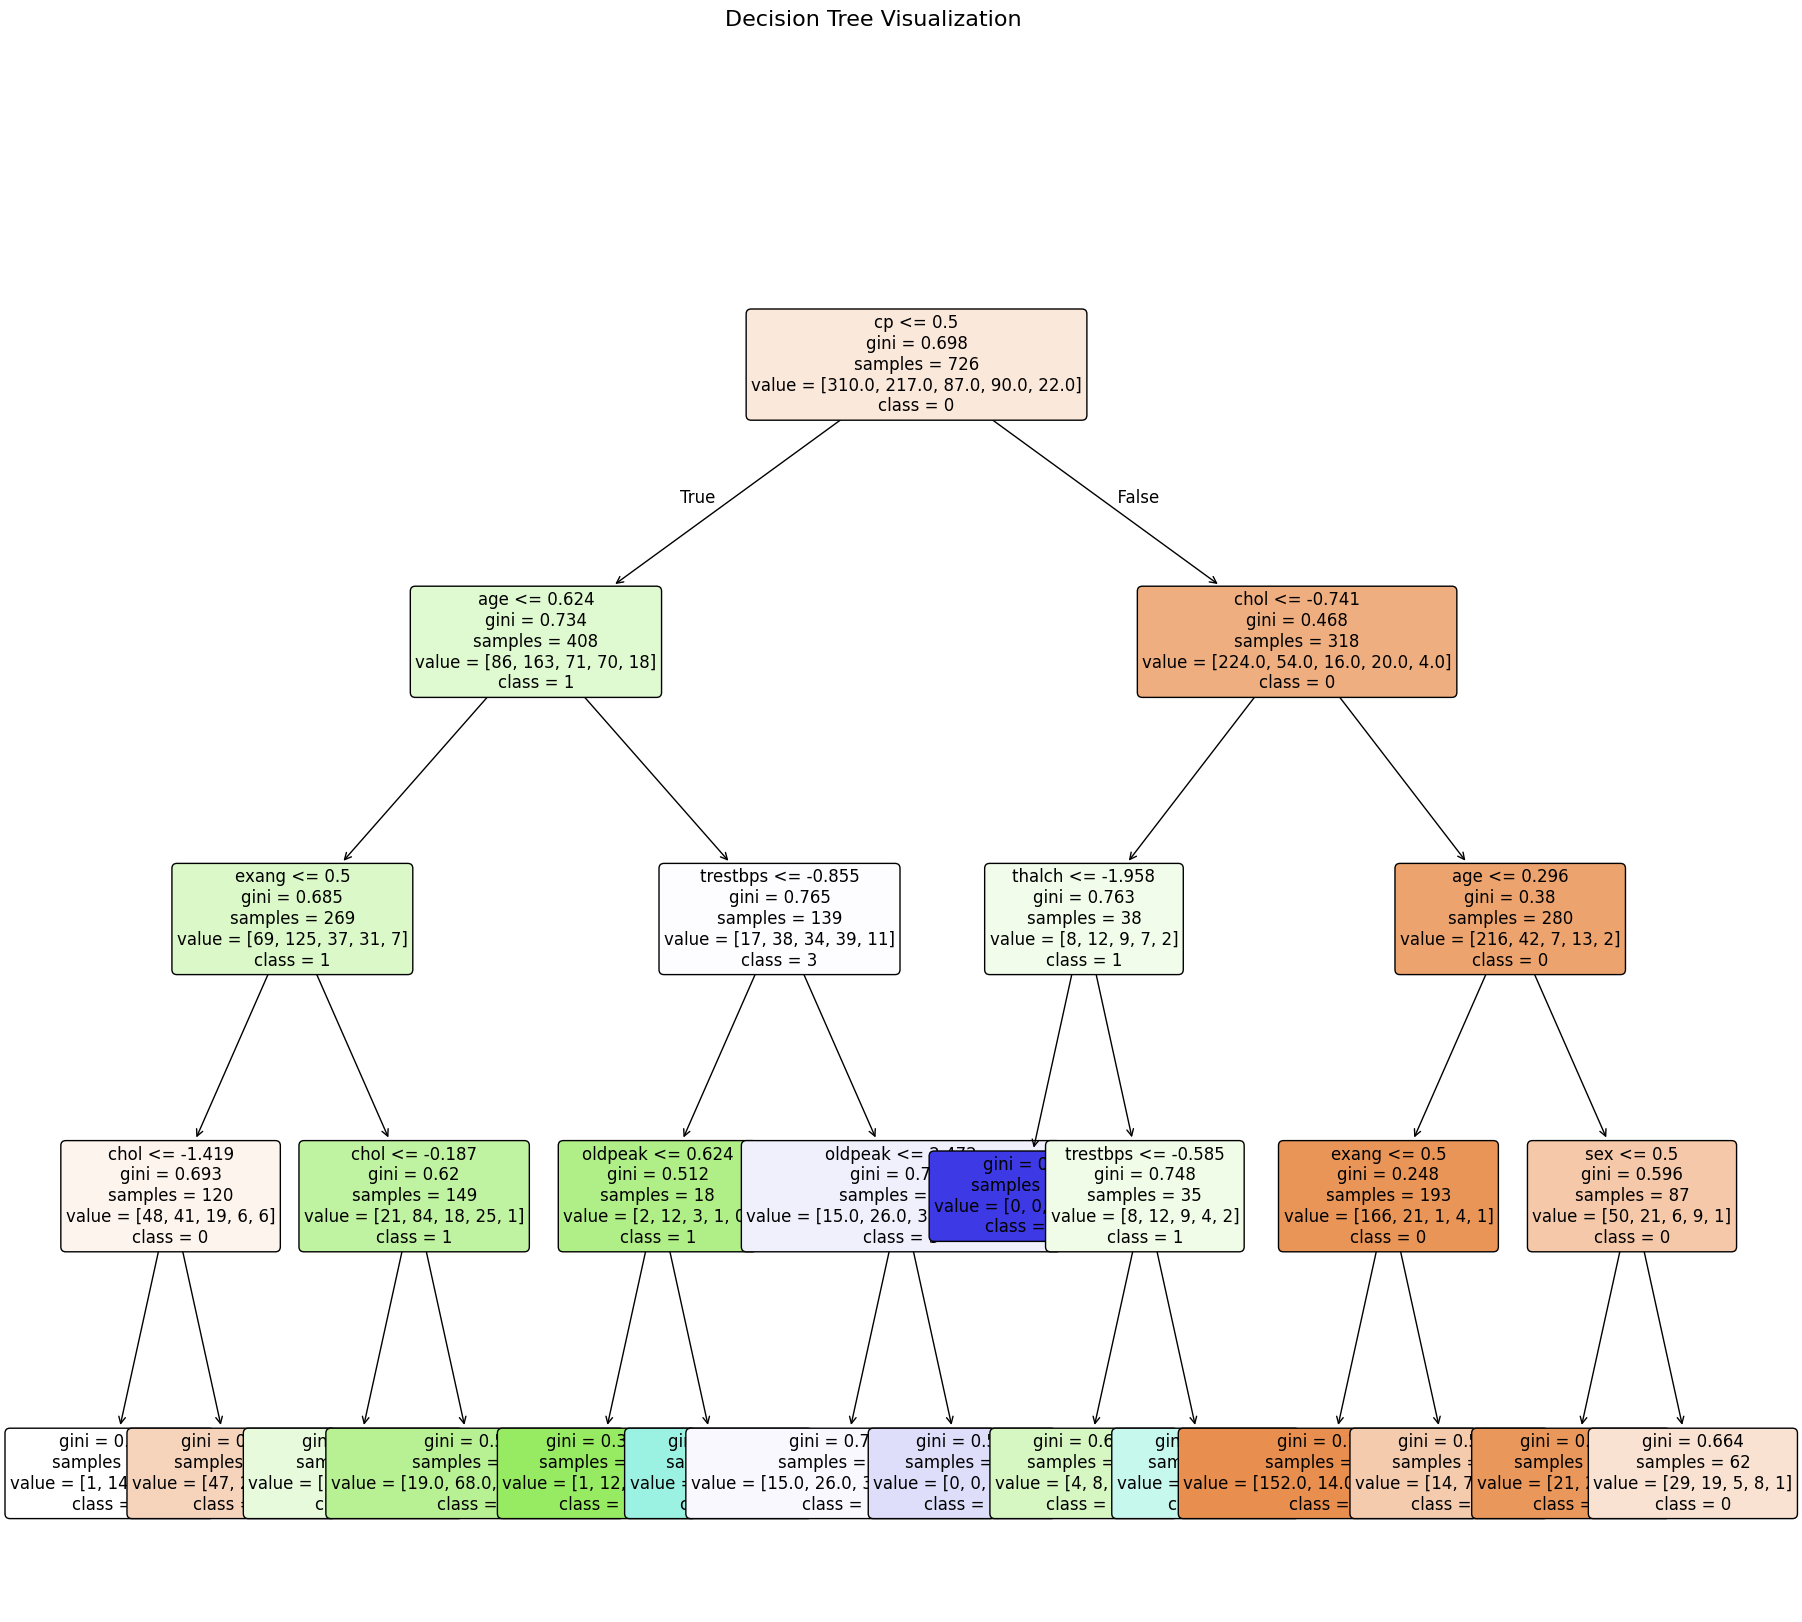

In [31]:
from sklearn.tree import plot_tree


class_names = [str(cls) for cls in sorted(df['num'].unique())]

# Plot Decision Tree
plt.figure(figsize=(22, 18))
plot_tree(
    best_dt,
    feature_names=X_train.columns,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=12
)

plt.suptitle("Decision Tree Visualization",y=1,fontsize = 16)
plt.show()

### **Interview Questions**

> **What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

- **max_depth(Maximum depth of the tree)**

    It prevents data from overfitting (too deep) or underfitting (too shallow).


- **min_samples_split(Minimum samples required to split a node)**

    High values reduces overfitting by forcing splits to have more samples.

- **min_samples_leaf(Minimum samples required in a leaf node)**

    Larger values create a simpler tree, reducing overfitting.
- **max_features(Number of features considered for each split).
    
    Helps in randomness and lower values reduce variance but may increase bias.
- **criterion(Splitting criterion: "gini" or "entropy")**
    
    "gini" is faster and "entropy" can lead to better splits in some cases.
- **max_leaf_nodes(Limits the number of leaf nodes)**.
    
    Controls model complexity and prevents excessive branching.
- **ccp_alpha	(Complexity parameter for pruning)**.
   
    Higher values prune more branches, simplifying the model.

> **What is the difference between Label Encoding and One-Hot Encoding?**

**<u>Label Encoding</u>**

- It converts categorical values into unique integer labels (for instance "Red" - 0, "Blue" - 1, "Green" - 2).
- Only suitable for ordinal data (where order matters, eg. "Low" < "Medium" < "High").
- It's down side is it misleads relationships in nominal data since numbers imply ranking.
- Best in using memory-efficient for large datasets with high-cardinality features.

**<u>One-Hot Encoding</u>**

- It creates new columns by converting each category into separate binary columns (eg. "Red" → [1,0,0], "Blue" → [0,1,0], "Green" → [0,0,1]).
- Best for Suitable for nominal data (where categories have no inherent order, eg. "Dog", "Cat", "Bird").
- It increases the number of features, which may lead to high memory usage for large datasets.
- Better at avoiding the risk of encoding an artificial ordinal relationship.